## Time Series with Python

### Merging Time Series With Different Dates
Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.
The pandas `.join()` method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

- Convert the dates in the stocks.index and bonds.index into sets.
- Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.
- Merge the two DataFrames into a new DataFrame, stocks_and_bonds using the `.join()` method, which has the syntax `df1.join(df2)`.
To get the intersection of dates, use the argument how='inner'

In [12]:
import pandas as pd

stocks = pd.read_csv("Data/stocks.csv", index_col=0, parse_dates=True)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2007-06-11 to 2017-06-09
Data columns (total 1 columns):
SP500    2519 non-null float64
dtypes: float64(1)
memory usage: 39.4 KB


In [13]:
bonds = pd.read_csv("Data/bonds.csv", index_col=0, parse_dates=True)
bonds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2503 entries, 2007-06-08 to 2017-06-08
Data columns (total 1 columns):
US10Y    2503 non-null float64
dtypes: float64(1)
memory usage: 39.1 KB


In [9]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

{Timestamp('2014-11-11 00:00:00'), Timestamp('2009-11-11 00:00:00'), Timestamp('2009-10-12 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2013-10-14 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2008-11-11 00:00:00'), Timestamp('2011-11-11 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2010-11-11 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2007-11-12 00:00:00')}


In [14]:
# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how="inner")
print(stocks_and_bonds.info())
stocks_and_bonds.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2007-06-11 to 2017-06-08
Data columns (total 2 columns):
SP500    2498 non-null float64
US10Y    2498 non-null float64
dtypes: float64(2)
memory usage: 58.5 KB
None


,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


### Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.
Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

- Compute percent changes on the stocks_and_bonds DataFrame using the `.pct_change()` method and call the new DataFrame returns.
- Compute the correlation of the columns SP500 and US10Y in the returns DataFrame using the `.corr()` method for Series which has the syntax `series1.corr(series2)`.
- Show a scatter plot of the percentage change in stock and bond yields.

Correlation of stocks and interest rates:  0.4119448886249271


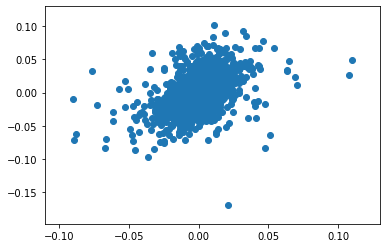

In [16]:
import matplotlib.pyplot as plt

# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y'])
plt.show()

### Flying Saucers Aren't Correlated to Flying Markets

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as ***"spurious correlation"***. That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

- Calculate the correlation of the columns DJI and UFO.
- Create a new DataFrame of changes using the `.pct_change()` method.
- Re-calculate the correlation of the columns DJI and UFO on the changes.

In [32]:
levels = pd.read_csv("Data/levels.csv", parse_dates=["Date"])
levels["Date"] = levels["Date"].dt.year
levels.set_index("Date", inplace=True)
levels.head()

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9


In [34]:
# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)

Correlation of levels:  0.9399762210726432


In [35]:
# Compute correlation of percent changes
changes = levels.pct_change()
changes.head()

,DJI,UFO
Date,,
1941,NaN,NaN
1942,0.076063,1.0
1943,0.138107,3.5
1944,0.120907,0.0
1945,0.266478,0.0


In [36]:
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)

Correlation of changes:  0.06026935462405376


### Looking at a Regression's R-Squared

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function `OLS(y,x)` in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the α in the regression `yt=α+βxt+ϵt`). To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.

- Compute the correlation between x and y using the `.corr()` method.
- Run a regression:
    - First convert the Series x to a DataFrame dfx.
    - Add a constant using `sm.add_constant()`, assigning it to dfx1
    - Regress y on dfx1 using `sm.OLS().fit()`.
- Print out the results of the regression and compare the R-squared with the correlation.

In [39]:
x = pd.Series([1.2811550440412238, -0.6126310598985145, 0.9332222021268057, 2.2693265731638363, -1.427691082555, 0.6405188010777155, -1.596489626936219, 0.33561618750787203, -1.661094450815615, -0.892276781318839, -0.3853601714404014, 1.1750613930276552, 1.0795261289242912, -1.2035994956420473, -0.056172151726598965, -0.3766366045789261, 1.5701795772212934, -0.9428046774925836, 0.15111742087150695, 0.9206869830404033, 0.39865553922740776, 0.509308881338481, -0.33266116373611765, -2.23945925855725, -0.4534897919461296, 1.0290382457244724, -1.8780126981110872, 0.21017468558027702, -0.4757487221856649, -1.2186501112582493, 0.9308799884171601, -0.6028764223428251, -1.2009086565864688, -0.0964592154016757, 1.212574421217251, -0.6424298804905836, -1.37811844503333, 2.3018322938539786, 0.3649715099125608, 0.45720613554168227, -1.3774898420827786, -1.4383766335317467, 0.063973133855837, 0.44278722045348, -1.9974962921111783, -1.4044702210471958, 0.08692671859178444, 0.5570923022590792, 0.7522245332145279, -0.4545804023390465, -1.0680666881208938, -0.11323127134326061, 0.031636849769069254, -0.5913536163273568, -0.7743368977153091, 0.6947645888461771, 0.8286835284249676, -0.924767578153199, 1.2618915478818902, -2.3626119374754966, 0.14534783815545224, 0.049616126607182204, -1.6283838027917457, -0.6800270946068546, -0.5884337805404406, 0.7260916073821183, 0.8092150965860476, -0.6693518909217461, 0.9388824358296493, -1.5595639187088612, 0.8316986060383421, -1.1608014157128452, -0.5898791339712739, -0.09934721933319744, 0.2656448155523166, -0.18394678158088928, 0.9564584613417034, 1.0313898667732246, -0.6584946536221273, -1.3743996656695014, -0.0631732256437111, 0.026892033235163947, -0.8496921931994855, -1.729939107593855, -0.13857788040834806, 1.005633140702026, 0.7383585048100306, -0.06374618401822056, -0.43627521742932374, 0.41300383170708127, 0.23527973389250745, -1.4402823175412254, -0.037024592454535196, 0.3163210863597245, 0.4334010006371085, -0.1794067693088721, -0.22272937057979608, -0.9145161654283759, 0.23768785153671315, 0.2838865108117988, -0.8192423257468685, -1.9910712050577701, -0.04006354807978106, -0.12033738970715552, 0.15510748588618137, -0.4352447189222036, -0.0487281261986246, 1.0126578930049703, -0.7907201580971653, 0.7428329253873476, 1.100457607102351, 0.15812950730365105, -1.2496169877073868, 0.5361294618762135, 1.233762471342156, 1.7284866572391626, 0.25594780064858513, -0.41149149785151656, -1.0497931002530645, -0.6235509427190559, -0.22097480931607114, -0.46150241750214294, -0.4961601004936394, -1.0958358832877453, 1.5092875490667619, -1.6290323928216552, 0.28681646837921426, -0.7418999422719599, -0.5499656749845604, 0.6326764122049733, -0.029633564332853045, -0.012109250331289711, -1.0441640436490787, -0.5562011045733684, -1.0941654365809972, 0.8860495062314049, -1.5088203163123568, 1.1374329048126899, -1.5501735403499899, 0.6954523634231947, 0.9546853946527298, 1.3765439821968224, 0.19330216840911907, 1.892079712068668, 1.3575960296100273, 1.1969930896344374, -1.1278705031605591, 2.03058893387105, -1.7353520911623042, 0.026824698899590858, -0.9310507631310321, 0.7791126068047515, 0.4347688092705445, 0.8543492855148576, -0.36223449264905516, -0.9940674283863438, 1.1226780657187447, -1.3693434103086404, 0.09262208932661621, 0.16669856561892382, 0.4959097730434428, 0.05771982648856984, -0.6053809875603205, 1.6330030670912459, 0.288167641685169, 0.5595427949202992, 0.49161723704835875, 0.03710723132111678, -0.017796291447584375, -1.6570629840076838, 0.3972959690857464, -0.9938556824225638, 1.8668058033948733, 0.07302987315908709, 1.398213208859564, 0.27355501335685684, 0.6690414670643127, 1.1038295883597358, 1.3931754019172784, 1.5883723046544935, 0.5418476161290624, 0.5544303328617051, 0.9750753573422007, -1.916275205762016, -0.3626735851149104, 2.0628270289912463, -1.0723062135838064, 1.3360361211494085, 0.5475010717195191, -0.617524225013694, -0.9951149589811019, 1.0753160668536368, 0.3617901279608233, 0.9195681367049232, -0.4004585726579531, -0.6068603367567185, 0.048114274223299905, 1.6377358736628664, 0.33899410124172297, 0.21872786133555278, -1.6137386502993685, 0.18580232306052935, 0.22686320183666522, 1.5578421135323661, 0.1550583148874443, -0.3003998683723746, 0.32638341890705735, -1.370763314129386, -0.7321718364215666, -0.029719106687211696, 1.7250975811712936, 0.4285524229951472, 0.2782490086843458, 0.21799582474990986, 0.6062628073626953, 1.4581079982282943, -0.42615886544821197, -0.613083279799305, -0.5239485031323156, -1.670621825863721, -1.2640011981364627, 0.4132286076001853, -1.0532361755894544, 1.2835926349746098, -1.5735587350796931, -0.4084227724876398, 1.224872313494202, 0.3415187228815285, 0.19644259010643528, 0.18081070948849623, 0.3623181904942318, 1.689157463781665, -0.9965124679839346, -0.8218393586151007, -0.7848407321055315, -0.3228685919425816, -0.7392740033123055, -0.1500074064532319, 0.8107759705086444, 2.084423434792031, 0.8834937342698636, 2.8462671773195503, -0.14121234494487378, -0.8049187751604127, -2.321357750576519, 1.4134332889826897, 0.7466704197993697, 1.1506086948952838, -0.5060139080093885, -0.3354555917233457, -0.7174196055120188, 0.46658579812084167, -0.9298327945813356, 0.8456943454100372, 1.6050684916244604, -0.4352825695391445, -1.9727099686582816, 1.1880683084519628, -0.02323359841623244, -0.24158816746740822, 1.9061970426288974, 0.49757036585345893, 0.5293471899531691, -0.8387104275950436, -0.5384323931023147, -0.7710273505799191, -0.4109576100166529, -0.5375557392726514, -1.5226691060085205, 0.14313515560202128, 0.7624238993783363, 0.7334933564387248, 0.6587312472188919, 2.3626061416920234, 0.3191632013596961, 0.04647159859516381, -0.2755369854000762, -1.2814167482484604, -1.0777145898391958, -0.9643591443282876, 0.15456707448551382, 1.437029181593196, -1.3800682370220185, 1.0731570224196485, -0.05897203935250225, -0.1439819613811889, -1.2485507089306842, -1.0057958766239532, 0.2789286444875427, -1.8381512357957208, 0.4710816881100636, -0.913624085432763, 0.9228774883219917, -0.5269972810731411, -0.27566919969978776, -2.4872289245654806, 0.1324871295970721, -0.10288181143216761, 0.3028590233167439, -1.1743571235057015, -1.2880133585328295, -0.3417605743186503, -1.077587395061371, -2.151807645950538, -0.3927978678746878, 0.08400358092594723, -0.8270919285328677, -0.6129373404939361, 0.6952301625622106, 0.5021781114624926, 0.1799869140519854, -0.6192803879513986, 0.00587192506491817, 0.594271575339764, 0.5897645313049396, 0.5922167751763496, 2.134722295912065, 1.3347873183650223, -1.486619153082548, 0.08560166020524435, -1.6925581993269394, 1.011708416153619, -0.14020801309204117, 0.48184848501024724, 0.6718729525263696, -1.127862151776186, -0.2990782844837448, -0.7975916684903256, -0.3975826691867548, 2.142217744330889, 1.4066085892138767, 0.5273293230858743, 0.1378760563116852, 0.532649039316254, -1.223478422259192, -0.10299034282643785, -1.2822830722842427, 0.1032967267630437, 1.928093739383223, -0.7740374677171789, -0.7438198607084211, -0.18269039221875313, 0.7846498395908826, -0.10984657843530585, -0.3863608426004779, 1.5077979737496812, 0.00482917034885061, 1.732017154629424, -1.2295623137610412, -0.5725147309505427, -0.24956431539792898, -1.487353180389997, 0.4174945289618317, -1.6923016399179027, -0.23941151210717423, 0.965475945065727, 0.5473140277406429, 0.2719169871221121, 0.6603713592024104, -0.25902229365406354, -0.7604130478169479, -1.0078748877980297, 0.7870183151313934, -0.21502826189311067, -0.17072095044503943, 1.0236868222160658, 0.37755614563511675, 2.6108068431657854, 0.5246756173219759, 0.4836598162210405, 0.26742536748967183, 0.0169831633554079, 0.4562201011537283, -0.6606608098771884, 0.9949365427832687, -1.226735600080754, -1.6380411876107703, 2.041699248954565, 0.33493880002694376, 0.4529649856245742, -1.5153549153241226, 1.0909300176620387, 2.4913638757172443, 2.10651569366746, 1.9351030231528283, -2.1958407413708603, -0.4138797661100451, 0.250136395904108, 1.592751568266953, -1.2389426603316052, -0.26438440815028813, 1.6003122903891118, 0.4369099686809913, 0.66219670316823, 1.1573741156588628, 1.4986431755506244, 1.3255114982392833, -0.17931322235265917, -1.1957287571528918, 0.533196745245951, -0.3310345732826881, 0.9349535940920656, 1.5696533587044477, -0.5976302756882733, 0.630972928035347, -0.8272691085540191, 1.7440692032035177, -1.0589381321382874, 0.49376280519717664, 1.0662321134033914, -1.1480332637032122, 0.3315584422919956, -0.3645639530891268, 1.3957648949802663, 1.4190645340791712, 0.7116013566560508, 0.14958564285001907, -0.8387551985432976, -1.2123958029963737, 0.12306868449402704, 0.019751710655750914, 1.047685567212333, 0.29271014402798606, 0.5786548342762493, 0.7047096725632085, -2.708538556470341, 0.05010884493866954, -0.2969818564128184, 0.3999492635439395, 1.7223695598737703, -0.586845060734203, -0.026973741469146, -1.4616921654481712, 0.138495855842951, -1.123850873579895, 0.017135589417939627, 0.09308131402918762, 1.1230826990102114, -0.20143798281762954, -0.7258410981859367, 0.24627241367922775, 1.1296361715909322, 0.058552159550198345, -1.7983273468722822, 2.210210728664325, 2.249115280136353e-05, -0.5984532062176234, -0.45670278983757234, 1.1603754016024759, -1.0449496803465854, -0.4435199490079035, -1.8261954122445656, 0.2584637202654191, -0.4083742936784235, 0.693394936295836, -0.17069021353895084, 0.5684291527085978, 0.6665539259234277, 0.7259434644264395, -0.7818996934482328, -0.5742831908261057, -1.0057955675400962, 0.2767666945183962, -0.02657171937867959, 1.4859056991110522, 1.1814689108569423, -0.3200975323792521, 0.2979647582167218, -0.3232515902839842, 0.5459492822819827, 2.9272109032239864, 0.8037546198436225, -0.7499979255776861, 1.0195486390030897, -0.19318912479046815, 0.5013507507734484, -0.3154248752490127, -0.6909048361483536, -0.162428172141605, 0.6619320564839841, 1.541660251566514, 0.24676306444895935, -0.6081792360254962, 0.2230484458049995, -0.19688612727743685, -2.0280595004339546, -0.2019706712044319, 0.15767319852175163, -0.09038685208329725, -1.2842696550826431, 0.27116452125930596, -0.7124928794583623, 0.017356569438715625, 1.1873032421525376, 1.7072145367579399, 0.6655242675765024, 0.8527135331212987, 0.5509525519030603, -1.2461593572236154, -0.7068798069098832, 0.8567847697718416, -0.9234348937646064, -0.8806828886735357, -0.05609809998169541, 0.5019083657396824, -0.4157581652339636, 0.7576816160052998, -0.2833796697872356, -2.2915502845187197, -0.09944721684838555, 0.3980119421690809, 0.09454416205183548, 0.14329540595075083, -0.8734928742311916, 0.7584630765437268, -0.7908212321453724, -0.4320523265745874, 0.37025365268475396, -1.062001122245369, -0.4828920876000209, 0.6936722586624583, 0.5858808880619747, 1.4508861702159925, 0.7500862350496543, 0.5420294884948335, 1.0398706462749154, -0.1948557651599005, -2.385752240649883, -0.47077742637789227, 2.064509427221515, -1.386038447705097, -0.21990377100261563, -0.22630975846881524, -0.2588868206001651, -1.2646588934123528, -1.0834969364983877, -1.401409873741469, -0.0792912256992738, -0.2639577678483505, 0.032443527882877736, -0.1958118189742201, -0.2696672440142078, 2.356910173616174, -0.6625621350495404, -0.9823303116647341, -0.23929616612266164, -0.34032350329971356, -0.057851705966839494, -0.30298116057390284, -0.6066365014043973, 0.9809215742936962, -0.6705935056817571, -0.17471250370687091, -0.5779101748507249, -1.452565538806313, -0.6818093230131186, -0.875640737584392, 1.0829587238449638, 1.8344569102333776, 1.7031903105405986, -1.5062289827032123, 0.17890924580770518, -0.8351542433791986, 0.2710173607705894, 0.31965118866128406, 0.07953331906928739, -0.8475414408512983, 0.24929629756979074, 0.2938749017440937, 0.8625826904665663, -0.11273579413889787, 2.8006286023584983, -0.1117548423137034, 0.39703141240929996, -1.521600652092554, -1.0163254285070924, -0.28332438531049664, 1.2965563661393242, -0.9501724981207302, 0.2289047380394984, -0.5596777441867471, 0.020094441466944817, 1.0979926410447785, -1.3706395935376305, 1.5666130505215872, -0.7501925731978024, 0.6444428853456805, 0.5117080499010401, 0.017447261865881667, 1.2959498184802178, -1.2468030429927888, -0.8573379299224981, 0.8039631360433173, 0.9543085510513728, -1.545932002127972, 0.9610860616851591, -1.958830433328374, -0.4483478967243869, -0.3776644755498551, 0.5354507909342476, -1.0430895803398843, -1.0779232456335477, 0.33595254329514174, -0.5436533946867769, -0.5306417023748377, 0.8078920393134098, -0.8419042600738254, -1.424370805760945, 1.0103737412666025, -1.9600896409016224, 1.0225799813611687, -0.3422881659706962, -0.6327289414396146, 0.5735534796741496, 1.4513051087363864, 0.6070670062511726, 0.8195271507826488, -0.8639349441826176, 0.969726864583193, -0.38714731089393417, -1.423694462749488, -0.24029038589401666, -0.4859663413673385, 0.7421587411711145, 0.8955230500216699, -1.1931899850241667, -0.5250812576299323, 0.21044349786095048, -1.0435990843554972, -0.3553472314138764, -0.5745147739830379, 0.7270555706490947, -0.69252072507968, 0.0824295389407393, 0.5676522158489848, 0.4926951570286256, 0.12162848455760715, -0.3325245708296114, -1.040665362591346, -0.15104187318030327, 0.8482850141165379, 0.7282104379946829, 1.623223724188598, 1.065346721644724, -0.4631233870124684, -0.561463658403215, 0.08141045468279497, -0.6033751809042917, -1.2494181168901144, -1.0226185527491465, 1.6672766121243676, 0.5161077828412061, 0.7303143773731128, -1.2042140822667036, 0.42095035407325243, -0.5998653289544662, 0.4730008839090102, -1.9236000119268668, -1.1632113128844814, -0.34857698511954055, 0.6361644542059346, -0.28998923755127615, 0.5156222422474026, -2.0302343228889934, -1.408920553545117, -0.7164483539762333, 0.53851393409135, 1.632852293911881, -0.7059173661787806, -1.292958091755332, 0.22475214833323107, -0.7183152270319154, -0.0016646080338889222, -0.8232330902111494, 0.651173508629377, -0.23430488957409498, 0.9596102360167784, 0.28027084053186496, -0.3071623437513136, -0.150701948491389, 0.26539723370731777, 0.6575421788781195, -2.356978810174661, -0.4189421126781944, 0.33527442916251604, -0.6961444008576461, 0.23852841584644008, -0.9148663907490183, -0.6938629955169826, -0.6512048216975727, -0.44042201807582315, 0.4538387099487502, -0.9022531905831274, -0.43919529829075504, -0.48533301832222464, 1.400748938049492, -0.3041538855755456, 0.8022650307410149, 0.14423517799219773, -0.6162872691345818, -0.9003867648716256, -0.6426862410461465, -0.6385018025685305, -0.27749862681611087, -0.8898549936931711, -0.4845848557476576, -0.7462569079316493, -0.6660847909048132, -1.061698323614797, -0.4595916991858538, -0.4964001994536581, -1.1517433065966902, -0.7147352986264145, -0.979615491705565, -2.0022433379234714, -0.7920934071778448, 0.28918556795146877, -0.14459509154605615, 0.6300675586142113, 0.09113513829642259, 1.6182337171766665, 0.697616497978575, 0.40845000090522027, 0.0392003485912506, 1.2886297909140367, -0.9013774801911525, -0.7218805040877588, -2.3364088265360605, -0.15122718168423352, 1.5917319487562862, 0.10945483690096314, -0.5218476396593968, 0.014770133898636802, 0.5219232582969562, -1.6651425334274597, -0.9810023979643574, -0.49861418819806225, -0.37784158380837596, -1.9509977835799683, -0.7596789412979185, 0.5756436940108495, -0.1263915844750892, -0.2881655458555227, -0.21126222635427996, 0.8763471869337076, -0.16128480613787813, -0.595613530727245, 0.8223961660652714, 1.3938876633750859, -0.08179642293560137, -1.1508612743295161, 0.45892509993606106, 1.4622506372355752, 1.4968046003337594, 0.4330563169849272, 0.08146859954689607, -0.23758794588910806, 0.14433456436630293, 1.4297074738636055, -0.11910530737610853, 0.24994708657435719, -1.5397817734025403, 0.4710670256217842, -0.7528800491508506, 1.4973821201153297, -0.7370596961142618, -0.36600088826730276, 1.0788087412974006, 1.1097788135373696, 0.5606108417697564, 1.5254143138934957, -0.9083822366856663, 1.4745649737166788, 1.0676285887446368, 0.2614622875043119, -0.761594329523209, 0.16746351806632892, 0.29831306786322237, -0.3868078445771079, -0.3281181510361313, -0.20920587718194528, -0.6971623037562072, 0.8201147170205032, 0.8068979989605962, -0.14410762019304135, -0.03255522222679558, -1.0687328094882182, -0.27438958461986906, -1.5786072326056277, 0.0031124932782617726, 3.0875196913749394, -0.36685895820665904, 0.29001956648771726, 1.3781054114403108, -0.9691407832538603, -0.2555576493873456, 0.8684177508230642, -0.5193399002961957, -1.3421682606120884, 0.3147406832043353, 0.772758949221254, 0.632743021432991, 0.6282855528469061, -0.294330104752678, -1.1039735835170281, 0.4838728779399808, 1.091109943724447, -0.11402960847367027, 0.7216136659581276, -0.7952585606905005, 1.2900928276303572, 0.668708214494058, 1.6316989496194068, 0.4674668654867797, -1.4593356445396, 0.39301110318936955, -1.0780779185918286, 0.7399814906750249, -0.13169334753431958, 3.4530817839133077, 0.9851471428823663, 1.1702458168488377, -0.1374401186829724, -0.7140970042251803, -1.9273051033500685, 0.7415692564142079, 0.9767403767921218, -0.5386368829957875, 0.7941641292747003, -0.4426336706151123, 0.3611363176429492, 1.4393665592850737, 2.6426340756142896, -0.5173806148613016, -0.44752540165620003, 1.5207648982104383, -1.5542109065186518, -0.047589885387081685, 0.8049529740098417, 0.8584215654325545, 0.017913031835165235, 1.6261315194960824, 0.3903778618028171, -0.2824949808393406, -1.2822231331821135, 2.130088826538941, 0.01525282560618788, 3.753551482974148, 0.8933018228811488, 1.7967146397256244, -0.49568160024234537, 0.6706407731678474, 0.05766387793080424, -1.2120724687166047, -1.397301133108583, 0.1364103906471751, 0.22922870887051736, 0.09482754488813724, 0.4136402992332198, 0.9468518836081644, 2.3604601352516617, 0.7087840009586248, 0.6514681982249536, -1.5323044536529693, -0.6848120551306541, -0.5713992805749842, 0.13574232809169298, 0.08506206933983652, 1.0479594242103552, -0.03500546590392013, -1.4870046523111058, 1.4954443709311964, 0.5678162494115871, -1.2341719498736567, 0.7054584945121818, 0.12042410075608224, -0.029205904548573313, 0.8326703835870282, -0.2694083369965819, -0.2668229884277391, 0.45620238647435685, -0.34032229625850546, -0.6571342553469359, -0.52289564080822, 1.6514728722994687, 1.7022788554271675, 0.29758492780508267, 0.983691367511512, -0.33069743391009315, 0.14838735834684125, 0.4159273914669916, -1.7371164885762094, -0.9483051236350288, 0.2962478462192728, 1.130862479425501, -0.7521448321882552, 0.44055994741992077, -1.290473114630968, 0.38701573131336925, -1.2742461550579223, 0.15125253505998273, 0.24692691390378116, -1.4827692967810617, -0.7407891807851247, -0.3008623268715242, -0.9350653262601603, -1.0243160100912239, 0.40587665586893784, 0.813381859712616, 0.316200062837867, -0.45605550217223334, -0.10950542409640848, 1.8219947355667738, -0.11927902452886274, -0.18333975346505604, 0.8557516820631766, 0.14484051586829436, 0.7622419333896986, -1.8925454922311127, -0.818023396988202, -0.20544826880253692, -1.3199128745826836, 1.729563516423699, -0.09626352514342396, 1.1631185076895898, -0.5852350001243455, 0.7039075333859474, 0.617544368248742, -0.511282797504639, 1.3172490445252845, -1.0704715956704887, -0.5025752028483513, 0.04221309666716833, 1.4173558637443744, -0.06031795298007711, 0.18892275187271276, -0.04927489195075641, 0.8608987480623188, -0.5286370591510503, -0.7362899547896913, 1.6056121506761227, 1.1748273187350537, 0.5067017023831254, -2.085925519310575, 0.3396871039965605, -0.6564751973305406, -0.3331057193479064, -0.14696606994721095, -0.42788188240430064, -0.7232036028128643, -0.129793812318884, 0.4848980562907761, -1.1247681212903056, 0.5718077336743665, -0.4230129805204403, -0.5503507083933211, -0.7077830026673683, -1.4722981939474487, 0.7169901009692797, 2.6282023232584417, -0.11992815403676732, 0.4353676973975298, -1.1420916946045905, 1.3386924595354746, 0.9180706850375504, -0.6787382291510811, 0.4793461018723987, 1.397851133836866, -1.1313343392628266, -0.683984118806693, -0.8310011879258917, -0.14420594489065325, 0.9182054158071498, 1.216339774257903, 0.7748184342131297, 2.7340141733751624, 0.0005404319387118655, -1.6109057403686418, -1.0636523116621077, 0.04669677587569681, 0.23914254343351313, -0.09076924413605764, 1.2235224703671055, 0.8581408680020675, -0.1437251143017076, 1.740802785806922, -0.32070034322663066, -0.12664089914099344, -1.3801308078906984, 1.035784268964063, -0.05602888306554742, 0.16418240278246704, 0.7863503496394391, 0.25154225043142625, 0.4682238397718219, 1.0890322480832832, 0.7436922974132252, -1.6115703065738287, 1.011224254361624, 1.5719710523592254])
y = pd.Series([-0.8351286009190672, -0.06100441499537612, -0.194677330631589, -2.4611421320699467, 1.040072990892944, -0.6828739396020767, 1.3107639678267742, -0.5298639831872226, 2.639054920254874, 1.0649845894270087, 1.052035801676665, -0.6492146582173699, -1.3647372713719814, 0.5646740628725941, -0.3292163536905029, -0.8749304916011758, -1.883174191714396, 0.8651524394848811, 0.15666513226527481, -0.793844987778514, -1.1712928255286783, -0.2526950984933609, 0.3273704057637023, 2.424119190394595, 1.454417921600079, -1.493598456173196, 1.5211081928494008, 0.26803795383150913, 1.2605576813226307, 1.6968970520786513, -0.5754065968246665, 0.009752477415448239, 1.561915809634276, -0.0077827232736593565, -1.123344542892297, 0.27072607156943584, 0.8874343256221449, -1.8368522031971426, -0.42133365389976307, -1.175414516001151, 1.0694182669881944, 1.7994158301635967, -0.5496034510258208, -0.985044049537418, 2.071036645930695, 0.8376931544450931, 0.43982915406535145, -0.09596389771269319, -1.3619875450452867, 0.285007545705001, 0.18352831476965914, 1.2752281128590326, -0.016368025541275942, -0.24134723602942829, 0.056375833843262335, -0.13893642883047652, -0.6045181655598098, 1.0494242786206278, -1.410579011186635, 1.4569839407534417, -0.3922580739101969, 0.28499606976433933, 1.5075322031407763, 0.9035176816076788, 0.3362393315340148, -1.2180458429821857, -0.6653524863688425, 0.8140115574040573, -0.13122804960129275, 1.4012502554784658, -0.7734647082014946, 1.309618437647121, 0.4950340199543207, 0.7900884968784077, -0.2015556492345248, 0.3108326180697597, -1.7958196412162415, -0.9562837890101289, 0.4211697757054076, 1.3103694234018777, -0.023570054303233504, 0.2881583503543797, 0.4479052396498257, 1.2402283884003817, 0.015864002170548185, -1.0392280889458745, -0.7057533944065573, 0.7220130094387418, 0.16292693533091762, -0.35040371958031274, 0.4174684307050774, 1.2797612914123162, -1.1065249909203736, -0.7537217897041183, -0.2582792036745885, 0.16600466912717265, 0.16632778775671594, -0.5304555619213652, -0.28726180106259136, -0.3813550423126317, 0.5517614900302444, 2.2988869499939746, -0.05235864358750514, -0.28900037602902284, -0.030476428364102706, 0.6944898693279178, -0.5845631094753875, -0.2916632456888246, 0.9560190622554623, -0.74120276252537, -1.347291281771406, -0.31985980150945287, 0.615143470662628, -1.1509086120876026, -1.17828298784928, -1.3913462901200206, -0.22518472313119609, 0.21732632728409726, 0.9628803906739333, 0.5345051781176213, 0.34604375756453193, 0.025778700949339116, 0.3535181985885683, 0.1332115507220299, -1.3467497524558527, 2.002482017436798, -1.0435253128347786, 0.7058620298051606, 0.6015288311009992, 0.6904611111905807, -0.041583058263442725, -0.24885630285378202, 0.8859602961150294, 0.6834794488264708, 1.2820754649058856, -1.4792728779721538, 1.2365965693647982, -1.4368954464740926, 0.9150349787144477, -0.9936577469384562, -1.4843326819574272, -1.582793263425021, -0.4985425104162844, -1.3315708369058545, -1.2332555735860795, -0.8981127007256928, 0.7353897756251918, -1.7194233851753498, 1.9212563409773007, 0.33978339077341935, 0.5603156861554537, -0.5058098466895491, 0.15403511311095938, -0.5186663257741796, 0.30568989517621464, 1.2982046637971552, -0.8363635677419465, 1.311006771933953, -0.3920973979405682, 0.14017971042533597, -1.0980191786092972, -0.6747515949956524, 0.41455952135834273, -1.78890508717576, -0.08730808916749108, 0.2761770828489287, -0.519522716313831, -0.16350248730212608, 0.259842285864462, 0.9552703090152659, -0.5975454381796642, 0.8343511124979328, -1.8275715472142229, 0.007357470866249986, -0.6294375283426397, -0.35776392846515653, -1.0853982206347939, -1.2797235485339382, -0.4734952482197081, -2.0929770660193125, -0.2406531601128485, -0.25213031345049236, -0.9485595561718797, 1.4834867550363189, 0.45521438502146405, -2.3262226647219744, 1.1327147851674544, -1.0271111332391483, -0.3864814910521105, 0.11722834295539541, 0.5445433254828663, -1.4701291926643976, -0.31286354900968205, -0.5864748140108972, 0.08973536473366796, 1.1261058916010336, -0.1442576147331307, -1.8199810453177645, -0.22925709425946764, -0.10959569693089637, 1.376753860943283, -0.7712788503736197, 0.20998084418460666, -1.8556224018418037, 0.22511925219840134, 0.44595162773616676, -0.11088269984684684, 0.606478957058956, 0.6880051085490362, -1.0628575995947624, -0.9657025138773654, -0.9136757654733096, -0.6114889769485324, 0.4604154281775538, -0.5372621991055229, -0.778268897850732, -0.05764535435919853, 1.149734070677476, -0.2092121091733229, 1.8093128333586201, 1.0176342671395302, -0.36383247546020187, 1.117183260206731, -1.166427504298986, 1.602988199266382, -0.15620395419868643, -1.5100569077149304, -0.2949813474272129, 0.5199522901637373, 0.29521358812747733, 0.2856512031937996, -1.956918449897968, 0.9197724014996493, 0.9940461549432806, 1.0590129550423013, 0.9903149317539083, 1.1837178740427534, -0.11020391792137656, -0.4749433371781799, -2.6690112923427125, -0.9942333813580929, -2.283349897856185, 1.0287445749254598, 1.2657184205737533, 2.0660175316732308, -1.5173466757092178, -0.8615351571905977, -0.8966450081164234, 0.4939737594811782, 0.27192857530052045, 0.7485638954826769, -0.050862984996839285, 1.5279603287615164, -1.0847064029232791, -1.7117580111758084, 0.3758920787990269, 1.7912112936648938, -0.9338254981311711, 0.269041239924053, 0.35060352969420205, -2.2309251076178858, -0.6531847485271, -0.3447290272489765, 0.33262521992775607, 0.8003958685249337, 0.13692565854859848, 0.44789540455929583, 1.3355443573541301, 1.5730451112880557, 0.13948070865982107, -1.4111891230665945, -0.187638343980973, 0.013243362197729269, -3.072426434616361, 0.07804947297679296, -0.08924880637945112, -0.5128548489001585, 0.9760750830094682, 1.0461755585253074, 1.1178687801853213, -0.05337978977617685, -1.4343327845105922, 1.9651101843833167, -0.8470074346493587, 0.42442974830423524, 0.0395558010498794, 1.345326196281462, 1.4415546340271979, -0.35361343763228753, 1.9237847350303976, -1.0077573572133016, 0.9853096167802949, -0.6211939804749285, -0.21558974556080812, 0.8718902074054266, 2.502837825731818, 0.5860048041907306, 0.22601843601179708, -0.9264425309488689, 0.6047991987791652, 0.9355350050934457, 0.17527559483491692, 1.212129996285403, 1.6671722546010892, 0.4139698006528976, 0.6297140643644672, 0.3139029645907753, 0.42706670492387344, -0.22750854651242883, -0.671998676579982, 0.2431602828428717, 0.5144468523538015, -0.524697682245477, -0.8869196935567136, 0.298742909953898, -0.7245155562878318, -1.8661387374721192, -1.7402264782147339, 0.5452665418204603, 0.27258496682237804, 1.2810800520845667, -0.20473996011401668, -0.18905922818964352, -0.9167888952990743, -0.1852059605567809, 0.6027125075608392, 0.11922698339665362, 0.7276654726847182, 0.3266522643178294, -2.1211976117402878, -1.072482605927704, -0.7978992083312557, 0.12052125541513824, 0.20175742263808755, 1.990659299330785, -0.5597616267088866, 1.096087800275874, 0.17769656555972038, -1.1995285876412514, 0.9315781085278209, 0.9928966083438362, 0.045049531009922, -0.6562037083491528, 0.5942678096267451, 0.004797525042239186, -1.564845506871891, -0.04869705977825815, -1.2515017358911724, 0.8613779951720202, 0.9986336465646574, -0.17461716554909484, 1.6577064243902737, -0.07186756079736258, 1.4699648631778892, 1.1084191586892835, -1.2111096173220595, -0.6181200759656393, -0.13739717717278396, -0.938834936851383, 0.32830098343116143, 0.9434821803499186, 0.49673119671066546, 0.03960232855322794, 0.5492725554776009, 0.36093692831721746, 0.5735719614904095, -0.3946939152059685, -2.1160693536411297, -0.5518635680566477, -0.5456807148119283, -0.28667423479323867, -0.08594587515020048, 0.12896714068903015, 1.0575370799085069, -0.4328691796731137, 0.9792456604321654, 1.3324932571029853, -1.5490818521503682, 0.1019538053880786, -1.0172456892719937, 0.8860052812538409, -1.95207865452835, -2.9560654830566793, -2.1224389504593404, -2.424476973402556, 2.350184993909178, -0.31094255442247554, -0.22862159240944485, -1.5363218522876991, 1.0831968948433943, -0.6488688721809964, -1.1272966611367068, -0.8526896514981273, -0.6878963364437285, -1.100794214133822, -1.1524998517053378, -0.7350695563049733, -0.19887046298447833, 0.581035065845718, -0.5332305217730403, -0.5672321558963068, -0.8597169089303115, -1.0032889586016045, 0.3676549816070723, 0.20154385703720945, 0.9973082794075395, -1.0152848661244311, 0.9925692251760728, -0.5777960012661414, -1.2767738153751444, 0.33964045300533535, -0.2806852246508079, -0.1626726809919302, -0.9086753281969658, -0.9679821133040046, -0.2287017484302373, -0.6712474761904214, 0.8309776075195926, 1.6113998109762353, -0.3241661494135685, 0.06531279533116849, -0.6711587435663129, -0.48189390293423895, -0.4753407715250453, -0.6443492043894243, 2.6845636770790255, -0.7959221408352424, -0.1990813019576479, -0.3321482864839041, -1.6519500762163362, 0.006764297216013477, -0.7917251445212186, 1.609524556893827, -0.21158658130421582, 1.081738758533241, 0.662016196505634, -0.5817226860721069, -0.4841648088498559, -0.023211398741577356, 1.1721412087903582, -0.6809357811910692, -1.931887685845895, -0.4580015305105127, 1.8245062266219392, -1.5757357083224197, 0.31525391701854727, 0.731077334942962, 0.5634798083057991, -0.9963677766855772, 0.9510095967894265, 0.6311659192646828, 1.7131620415049307, -0.31075718420451387, -0.6079712440343344, -0.5592822574491567, -0.1867851236334443, -0.7274641784212689, -0.8959971340932692, -0.32552144880940265, 1.1994116402176425, 0.25751174579805997, 0.8652584328547716, 0.3217037211381487, 0.13716049965096547, -1.2681085218036827, -0.7289157387036611, -0.6799475756041976, -0.3999449039817398, 0.6231138473325765, -0.09298085509382946, -3.2465164901782626, -1.3646425370290651, 1.120814201007724, -0.49270553055824784, 0.004606261917645445, -0.849404447840968, 0.6061829861423851, -0.2259803829117142, 0.41528120242872174, -0.6425898256870864, -2.0917191379940356, -0.3852879872746276, 0.07737006632550128, -0.44208462240686014, 0.8323957730786525, 1.326631787764381, -0.29556756172921794, 0.031462053121549025, 0.06846815404386546, 1.6067059132638761, -0.26033687150137474, 0.9851994841659273, -0.8112693032942038, -1.1220193480659464, -1.775367428150278, -0.21864482871235116, -1.7166268838508927, -0.2670778495323081, 0.8394959526625937, 0.2098330002179524, -0.6029486915581515, 0.4764982356085541, 0.04506436899875718, -0.4511530380389726, -1.0725875065282233, 0.6634583586114344, -0.5897161023344912, 0.22593429888349945, 1.9154979347685708, -0.07156146139542914, -0.3267207266534765, -0.4793387070970653, 0.38545938086748527, 0.9642971299389009, -0.6750892246414598, 1.323537265071567, 0.26910683304195515, -0.02498421762860199, 0.2759339588922596, 0.8009899035818229, -1.0357822141384223, -0.8901036618630953, -1.310867202679047, -0.7815628434531199, -0.42791063166025234, -0.9301846361158219, 0.5649673152228756, 1.450135885822667, 0.15363016218797498, -1.6881207700896754, 1.2108972111953078, 0.1912477816463337, 0.6200973167111856, 0.41351983396980974, 1.1910197089897347, 0.7158871721876354, 1.7313754203157241, -0.8663634540184704, -0.2645634670436962, 0.6165388990391645, 0.1162021576778026, 0.39741389527177323, -2.2491599323467155, 0.5465810303146639, 0.9252325061115448, 1.2558596740012449, -0.5282244055567069, -0.7139897685127677, 0.8885407174426136, 0.7498826888948223, -0.27626958615143227, 0.7978121589570587, 0.22463377612490337, 0.3036219218847386, 1.5206939474266443, 0.48791214187544585, -0.14478996902488192, -1.0970071130274728, -0.7435177758190721, -1.5484987928781087, 1.7214670990104932, -0.42583558677259536, 0.47726231473696157, 0.038096052897151116, -0.2805155223625518, -0.5132399922408362, 1.4705396030720284, -0.36806556637150684, -0.05291475247876026, -0.9021724106554729, 0.39986577222888964, -2.620221202571141, 0.5624246103349794, -0.6288460130766073, 0.822535721205695, 2.15935617933679, 0.6474002907697215, -1.60717294563803, 1.1119812403517202, -0.12476249608497518, 0.4286013618780339, -0.03633159309394091, -0.9532767239907178, 2.1451966050479645, -1.311419010975985, 0.56660671312809, -1.2351290037741947, -0.35517920546109255, -0.2906648448779417, -1.1391047395660956, 0.8322709351313324, 0.016811048440167207, -0.47767425446309264, -1.224620872006959, 1.2181942107787327, -0.7035588452833823, 1.8516467744656862, 1.0501941704766498, 0.256953520471082, -1.1728245091137073, 1.1240160761185238, 1.5201840920392329, -0.8667444118086592, 0.2607877167620652, 0.2036606154765182, -0.8709450461805627, 0.9789930688211912, 0.8727052412665653, -1.050248959756164, 2.261639558143545, -1.0566310270913808, 0.0879641689887834, 0.5627641014888486, -0.009949510620575518, -1.8814375338069855, -0.9861615054025421, -0.601074061339009, 1.2736010499868522, -1.0177656092236762, 0.49447989411611204, 1.121675811107636, 0.06443226401984596, 0.0034689738695751183, -1.0686742438906895, -0.20327072084000522, 1.0980901612023022, -0.18797220682385504, -0.1390616280261179, 1.1897505980676946, 0.4885108439456383, -0.050134919134401, -0.08535468633790749, 0.9135491124267225, 0.2124816186721891, -1.2742763336812466, -0.25212865228164333, 0.3318276218970302, 0.3525786106287421, 1.5470792059323741, -0.3422570211804259, -0.9204881581661553, 0.01316341403563022, -1.6519606801021933, -1.013111337887004, 0.2820479552777713, 0.47263499017623906, -0.26829597409628075, 0.6653149184703697, 1.817390508429139, 0.05688688992439631, -1.2262119474031368, -0.4110824615891767, -0.4987084352785847, 0.6632521116301329, -1.164992319734768, -0.14487071556052242, -0.24062371480622027, 2.088361703429373, 1.279110670671242, 0.2542493976331204, -0.11096657857793092, 0.44038553510059264, -0.6699295955570451, 2.0000465866003365, 1.1762569151543973, 0.8460488856960432, -0.24846778832539768, -1.3758737786327224, 0.8280394084692945, 1.2625026425566397, -0.06597364397623037, 0.9731556523617573, -0.4434148149501292, 0.4701260817399749, -0.9439388371569425, -0.12180971530516568, -1.2542533108639282, -0.07710865015291997, -0.17603499466635414, 0.2950426056823578, -0.6214892965784424, -0.8953758772257824, 1.9593735415796323, 0.09958572299840592, -0.6510682451385197, 0.8656865759426796, -0.013609070052617028, 0.5344150561018873, 0.37292834968210176, 0.9822316450476345, 0.3465401042268712, -0.5717370481593201, 0.5971054703288382, -0.34236822612223855, 0.02223063152501999, -1.1687725906574817, 0.10586944426631484, 0.21337214590510878, -0.23422172147043996, 0.6552898120563176, 1.0244656411284943, 0.8409496290315752, 0.6194268145648701, 0.1562878693937707, 0.287888193886669, 0.9309153610206364, 0.6997029925032779, 0.31878825262511706, 0.5701143012807507, 0.6978033278005473, 0.29645831542061674, 0.33009348152386797, 0.800348934463625, 1.0690801175262108, 1.5810489275007527, 0.3958601539534113, 0.04281354616881958, 1.0745930617700512, -0.054950273680818396, -0.4045871868644608, -1.5454852016847376, -0.3185952077687233, -0.6215926970923221, 0.7305507571259972, -0.8335395096830446, 0.802567438371458, 0.5947482213539691, 2.2862782880716557, 0.00552874477217613, -1.709417717939578, 0.5617781652973668, 0.43715335055980953, 0.13162092831509203, -0.21681758902938303, 1.502737480383597, 1.372907435310837, 0.5486688465014347, 0.28062040088401696, 1.6297181252760515, 1.4527355642894983, -0.05426108354313248, 0.15427972976539, -0.4335169417881578, 0.8568382011803327, -0.4974058190480708, -0.32738069328901365, 1.3496321241965947, -0.725886713891028, -1.4126739073506405, 0.8657214303512696, 1.8854088632627228, -0.5685662517104995, -1.7820779034972276, -1.3333315305007223, -0.9256273304326064, -0.6113616832331479, 0.36479673242228206, -0.47110257310565057, -1.1813444496459788, 0.3267534955325383, -0.34740544104937127, 1.2711920562999022, -0.13838837257970832, -0.16239722670141785, -1.7929148468748217, 1.0374410281852575, 0.6467365826435185, -0.8100123096600219, -0.6861337314986262, -0.4346638307931161, -2.128655774250894, 1.2177395000370108, -0.8996308771909305, -1.0587017116974322, -0.6744261177245441, 1.5151409625322352, 0.5149839442728665, -0.24987599015708883, -0.13048809645106724, 0.6455025719498002, -0.5473682454010533, 0.019627662862032696, -0.7613413282985465, -0.6934503519759025, -0.5850725868256018, 0.2948816300949554, 0.9047985827761954, -0.3942433390587412, 2.251667356221582, -0.05894343129140028, -2.6245361983282276, 0.7303594772766099, -0.49995451917562633, -1.0301688826703248, 1.4717564854918987, 0.10947456718482437, -1.1822501238511427, 0.3920837621715219, 1.8575175444530967, -0.8584012859084936, -0.2963052111610501, -0.3885697714869025, -0.47481787633773975, 0.7352081350739362, 1.6899257763805653, -0.549621655536818, -1.1965116085691776, -0.06662676646404964, -0.2600533788212141, 0.97375136675372, -1.2002337976178175, -0.08029700605296085, -1.8816125018560808, -0.6761251158864803, 0.4073289815726317, -0.012557251751150106, 0.8325228343702813, -0.5851500736714067, 0.16273136414455638, -3.9571685184156546, -0.6975843905737343, -1.638311891490591, -0.4383899498731495, 0.5390559572860592, 1.6456863317405426, -0.381813516712245, -0.30074647336334515, 0.40273764267681067, 0.48071112756120604, 0.5099290379543837, 0.10269664410803683, -1.5203963064975958, -2.8811812178653438, 1.1355330381166666, 0.733728056466949, -1.8241428894973772, 1.3199335876913987, -0.3126683869300254, -1.0152637656368146, -0.43021374462763834, 0.43774566758539546, -1.0780922109710034, 0.4322037424391844, -0.3853746142222261, 1.2211837374674344, -2.065155791036126, 0.4659994235011272, -3.239761434249477, -0.03185757015558928, -1.552831668631661, 0.3069061540090139, -0.8377846308107615, -0.618218395526103, 0.7236256247824069, 0.5972652740685637, -0.20899607885924681, 0.19843980984266132, -0.299619802946286, 0.025079303856235437, -1.403308713220161, -1.4538469569917025, -1.5519746708504625, -0.9253665117890424, 1.324395199438293, -0.1160490200892289, -0.16596481627273799, -0.47556696161315065, 0.19865412914889677, -1.5561811954881166, 0.342368979767648, 1.2759682548933864, -1.4119828118737403, -0.9812295297180748, 1.5108705191089844, -0.7138265475096489, -0.04659109590334553, -0.8205278901107289, -1.070586489272524, -0.21460841610333678, 0.09631320741008491, -1.0242871391502386, 0.5300497061994761, 0.9027834176968405, 0.6937663940700887, -1.776298629948592, -1.0899486001439687, 0.27026714926143897, -1.0247765298666414, 0.1827134956160951, 0.5144562902463607, -1.59564219165742, 1.3830743733075401, 1.2398496146033884, -0.12615248531274562, -1.092448104166287, 0.4058527095300118, -0.30076387552194483, 1.2890622273482375, -0.4524948562808326, 0.9873531167931605, -0.43400815098799417, -0.15135933523977815, 0.5326303447803972, 0.3420580637655695, 0.8552439475444681, 1.005706640275822, 0.6024218879610441, 0.27365147653603067, -0.7251604071340673, -0.4034552233141353, 0.33552298351653376, -0.1161510741361051, -1.7356404162116643, 0.7374057890601887, -0.440392863540994, -0.6140808783233639, -0.019937835373290917, 0.07396203397441399, 1.475923263020116, 0.954004231593583, -0.1790158879202037, 1.8410322470217249, -1.1108473941141084, -0.17107654683025816, -0.7405820189209587, 0.19430488124406078, -0.877213133892288, -0.3815138372168757, 0.22701151896720698, -1.913831653047473, 0.6255788269572155, -0.28593281727612363, 0.816225208825358, -1.1715237715870714, 0.4708081327913606, -0.06691172858963793, 0.30545798867900137, -0.7748330455340461, 1.0509783310521734, 0.23006360328719602, -1.4228692443994069, -0.7972294037423477, -0.05429329907326862, 2.0580539716569923, 0.11356072183027066, 1.4174575043243387, 0.05007901143451323, -0.13192938376661625, 0.03959328983755052, 1.035130682671959, 0.14123199175408116, 0.10196031148966289, 1.1899346797509782, -1.0981103018572353, 0.13766300733678496, 0.3774152067624021, 0.8005419199122669, 0.4732653940626776, 0.27438769057062173, -2.2513567954103326, 0.694911145290376, 0.09697499121064398, 1.2300944273844185, -0.930384419140953, -0.9795073550971156, 1.1671257547001797, -0.19895080857955924, -1.60910629513907, 1.7321157382917554, 0.620553808442369, 0.8206132246477095, 0.1837319831396932, -0.5935619708743829, -0.8693714074655606, -1.0977405113428507, -2.8038168150266114, 0.3693376381270472, 0.9444620352467245, 0.8561298846744425, -0.0937742156636077, -0.6371228668572977, 0.4535243360287085, -1.2322246907687768, -0.3680297493571115, 0.8184385530730466, -1.2782960057055743, -0.003607082617419526, 0.8269922697547579, 1.7478379673018143, -0.8972091198449379, 0.6114756025487191, -0.15721848971159086, -0.4875726168694107, -0.1683700970680314, -0.4470976422645183, -1.0170804253102823, -0.4309430601515828, 1.9897793997817539, -1.1719066305299213, -1.5659023361893578])

In [41]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

The correlation between x and y is -0.90


In [42]:
# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])
dfx.head()

,x
0,1.281155
1,-0.612631
2,0.933222
3,2.269327
4,-1.427691


In [43]:
# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)
dfx1.head()

C:\Anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,x
0,1.0,1.281155
1,1.0,-0.612631
2,1.0,0.933222
3,1.0,2.269327
4,1.0,-1.427691


In [44]:
# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:11:29   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.013     -0.391      0.6

### A Popular Strategy Using Autocorrelation
One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see [here](https://www.quantopian.com/posts/enhancing-short-term-mean-reversion-strategies-1).

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the `.resample()` method to get weekly prices and then compute returns from prices. Use the pandas method `.autocorr()` to get the autocorrelation and show that the autocorrelation is negative. Note that the `.autocorr()` method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

- Use the `.resample()` method with rule='W' and how='last'to convert daily data to weekly data.
    - The argument how in `.resample()` has been deprecated.
    - The new syntax `.resample().last()` also works.
- Create a new DataFrame, returns, of percent changes in weekly prices using the `.pct_change()` method.
- Compute the autocorrelation using the `.autocorr()` method on the series of closing stock prices, which is the column 'Adj Close' in the DataFrame returns.

In [50]:
MSFT = pd.read_csv("Data/MSFT.csv", index_col='Date', parse_dates=True)
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [51]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W', how='last')
MSFT.head()

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091


In [52]:
# Compute the percentage change of prices
returns = MSFT.pct_change()
returns.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


In [61]:
# Compute and print the autocorrelation of returns
autocorrelation = returns["Adj Close"].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


* Since the autocorrelation of returns for MSFT is negative, we can conclude that the stock is 'mean reverting'.

### Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame daily_rates contains daily data of 10-year interest rates from 1962 to 2017.

- Create a new DataFrame, daily_diff, of changes in daily rates using the `.diff()` method.
- Compute the autocorrelation of the column 'US10Y' in daily_diff using the `.autocorr()` method.
- Use the `.resample()` method with arguments rule='A' to convert to annual frequency and how='last'.
    - The argument how in `.resample()` has been deprecated.
    - The new syntax `.resample().last()` also works.
- Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.

In [66]:
daily_rates = pd.read_csv("Data/daily_rates.csv", index_col=0, parse_dates=True)
daily_rates.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [68]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()
daily_diff.head()

,US10Y
DATE,
1962-01-02,NaN
1962-01-03,-0.03
1962-01-04,-0.04
1962-01-05,0.03
1962-01-08,0.01


In [70]:
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff["US10Y"].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

The autocorrelation of daily interest rate changes is 0.07


In [72]:
# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()
yearly_rates.head()

,US10Y
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


In [73]:
# Repeat above for annual data
yearly_diff = yearly_rates.diff()
yearly_diff.head()

,US10Y
DATE,
1962-12-31,NaN
1963-12-31,0.29
1964-12-31,0.07
1965-12-31,0.44
1966-12-31,-0.01


In [74]:
autocorrelation_yearly = yearly_diff["US10Y"].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of annual interest rate changes is -0.22


* Notice that the difference between daily autocorrelation and annual autocorrelation.

### Taxing Exercise: Compute the ACF

Above, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. 
You will compute the array of autocorrelations for the H&R Block quarterly earnings from the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, supress the confidence interval by setting alpha=1.

- Import the acf module and plot_acf module from statsmodels.
- Compute the array of autocorrelations of the quarterly earnings data in DataFrame HRB.
- Plot the autocorrelation function of the quarterly earnings data in HRB, and pass the argument alpha=1 to supress the confidence interval.

In [34]:
HRB = pd.read_csv("Data/HRB.csv", index_col=0, parse_dates=True)
HRB.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


In [81]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [82]:
# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


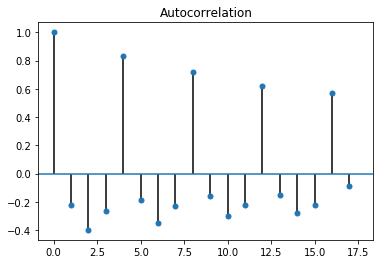

In [83]:
# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

### Are We Confident This Stock is Mean Reverting?

Above, You saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is 1/N‾‾√ where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is ±1.96/N‾‾√. This approximation only holds when the true autocorrelations are all zero.

You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter. 

- Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.
- Find the number of observations in the returns DataFrame using the `len()` function.
- Approximate the 95% confidence interval of the estimated autocorrelation. 
- Plot the autocorrelation function of returns using plot_acf that was imported from statsmodels. Set alpha=0.05 for the confidence intervals (that's the default) and lags=20.

In [89]:
returns = pd.read_csv("Data/returns.csv", index_col=0, parse_dates=True)
returns.head()

,Adj Close
Date,
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218
2012-09-16,0.008400


In [91]:
# Import sqrt from math
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly MSFT returns is -0.16


In [93]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)
nobs

260

In [94]:
# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

The approximate confidence interval is +/- 0.12


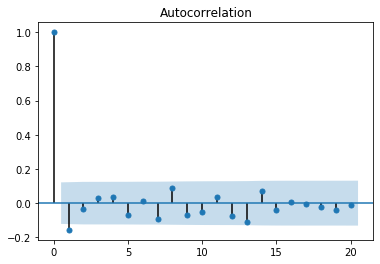

In [97]:
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

* Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero.

## White Noise
### Can't Forecast White Noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modelled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.
You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use `np.random.normal()` to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.
Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

- Generate 1000 random normal returns using `np.random.normal()` with mean 2% (0.02) and standard deviation 5% (0.05), where the argument for the mean is loc and the argument for the standard deviation is scale.
- Plot the time series.
- Verify the mean and standard deviation of returns using `np.mean()` and `np.std()`.
- Plot the autocorrelation function using `plot_acf` with lags=20.


In [101]:
import numpy as np

# Simulate wite noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

The mean is 0.021 and the standard deviation is 0.049


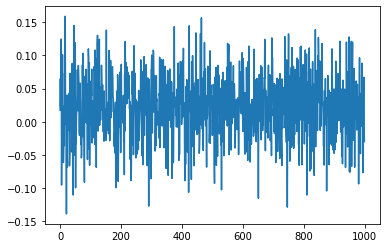

In [102]:
# Plot returns series
plt.plot(returns)
plt.show()

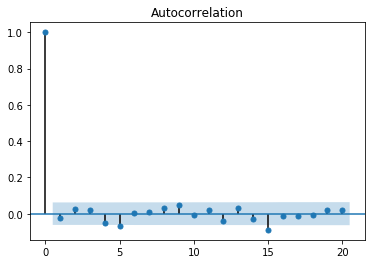

In [103]:
# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

* Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

### Generate a Random Walk

Whereas stock returns are often modelled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.
You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. 

- Generate 500 random normal "steps" with mean=0 and standard deviation=1 using `np.random.normal()`, where the argument for the mean is loc and the argument for the standard deviation is scale.
- Simulate stock prices P:
    - Cumulate the random steps using the numpy `.cumsum()` method
    - Add 100 to P to get a starting stock price of 100.
- Plot the simulated random walk

In [12]:
import numpy as np
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)
steps

array([ 2.19744474e+00,  1.33464628e+00,  1.19306107e-01,  4.25167192e-01,
        1.20444772e+00, -3.58459433e-01, -3.26822962e-02,  7.25882969e-01,
        8.49573025e-01, -3.41696134e-01, -4.51145039e-01,  8.31874532e-01,
       -9.45797417e-01, -5.22405059e-01, -3.22308617e-01, -2.29262428e-01,
       -6.48720000e-01, -5.07783484e-01, -1.55122864e-02, -1.18312938e-01,
       -8.94615607e-01,  3.63182347e-02,  2.10478403e-01,  1.48682986e+00,
        1.65972329e+00,  5.66350993e-01,  1.80401493e+00,  1.65553628e+00,
       -1.06488475e+00, -1.78228617e+00, -1.34102716e+00,  2.18953552e-01,
       -1.92435115e+00, -2.26334653e-01, -3.20433014e-01, -5.46284350e-01,
       -1.32656697e+00, -1.03782151e+00, -9.07270973e-01, -7.08313449e-01,
        4.51641355e-01, -8.56740872e-01, -3.46959966e-01, -4.05126057e-01,
        1.87432748e+00, -1.00507365e+00, -9.97309367e-02,  4.82057997e-01,
       -7.94335944e-01,  1.30570256e+00, -6.24204731e-02, -1.45154020e+00,
        1.34538022e-01,  

In [13]:
# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)
P

array([100.        , 101.33464628, 101.45395238, 101.87911958,
       103.08356729, 102.72510786, 102.69242556, 103.41830853,
       104.26788156, 103.92618542, 103.47504039, 104.30691492,
       103.3611175 , 102.83871244, 102.51640382, 102.2871414 ,
       101.6384214 , 101.13063791, 101.11512563, 100.99681269,
       100.10219708, 100.13851532, 100.34899372, 101.83582358,
       103.49554686, 104.06189786, 105.86591278, 107.52144906,
       106.4565643 , 104.67427813, 103.33325097, 103.55220452,
       101.62785337, 101.40151872, 101.08108571, 100.53480136,
        99.20823439,  98.17041287,  97.2631419 ,  96.55482845,
        97.00646981,  96.14972893,  95.80276897,  95.39764291,
        97.27197039,  96.26689674,  96.16716581,  96.6492238 ,
        95.85488786,  97.16059042,  97.09816995,  95.64662975,
        95.78116777,  96.31083186,  96.86541993,  97.53888275,
        96.46432198,  96.83777254,  96.38833747,  97.73735187,
        97.71640837,  96.91349501,  99.72216366,  96.97

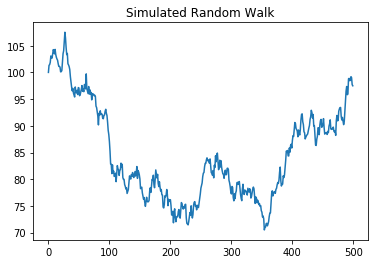

In [14]:
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Get the Drift

In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.
You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.


- Generate 500 random normal multiplicative "steps" with mean 0.1% and standard deviation 1% using `np.random.normal()`, which are now returns, and add one for total return.
- Simulate stock prices P:
    - Cumulate the product of the steps using the `numpy .cumprod()` method.
    - Multiply the cumulative product of total returns by 100 to get a starting value of 100.
- Plot the simulated random walk with drift.

In [16]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1
steps

array([0.98124345, 0.98899898, 0.99569644, 0.99494872, 0.9883835 ,
       0.99850044, 0.99275678, 0.99360366, 1.00993288, 1.00624667,
       1.00376053, 0.99380896, 0.99458346, 1.00070292, 0.99583136,
       1.00043715, 0.99610527, 1.01481456, 1.00240388, 1.0066158 ,
       0.99489013, 0.98416609, 0.99693353, 0.99374267, 0.98618914,
       0.99313158, 1.00054232, 0.99994876, 1.0155029 , 0.98684101,
       1.01605068, 1.01048743, 0.99902194, 0.98656836, 0.99680468,
       1.01267776, 1.00148038, 1.01981544, 0.99581585, 0.99839041,
       1.0149825 , 1.00473822, 0.98589673, 1.00214341, 0.99746279,
       1.00637258, 0.99451499, 0.98954061, 0.99917367, 1.00524146,
       1.00352822, 0.99920919, 1.00523768, 1.00301766, 0.9995876 ,
       1.00203612, 0.98593794, 1.00746847, 1.01429083, 1.00769628,
       0.99177822, 0.9999588 , 0.98514164, 1.01334234, 1.0066942 ,
       1.00886117, 1.01741837, 0.99648376, 0.97884092, 0.99307568,
       0.97527894, 1.01378878, 0.9979706 , 1.00275078, 0.99223

In [17]:
# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)
P

array([100.        ,  98.89989769,  98.47427644,  97.97685487,
        96.83870629,  96.69349126,  95.9931195 ,  95.37911457,
        96.32650378,  96.92822336,  97.2927251 ,  96.69038232,
        96.16665532,  96.2342527 ,  95.83308709,  95.87498086,
        95.50157408,  96.91638816,  97.14936391,  97.79208479,
        97.29238016,  95.75186163,  95.45824179,  94.86092759,
        93.550817  ,  92.90827095,  92.95865703,  92.95389427,
        94.39494951,  93.15280746,  94.6479732 ,  95.64058752,
        95.54704537,  94.26369146,  93.96248852,  95.15372279,
        95.29458631,  97.1828903 ,  96.77626235,  96.62049234,
        98.06810846,  98.53277706,  97.14314265,  97.35136009,
        97.10435917,  97.7231649 ,  97.18715211,  96.17063343,
        96.09116437,  96.59482196,  96.93562937,  96.85897126,
        97.36628771,  97.66010651,  97.6198313 ,  97.81859745,
        96.44306651,  97.1633489 ,  98.55189419,  99.31037747,
        98.49386909,  98.48981104,  97.02641378,  98.32

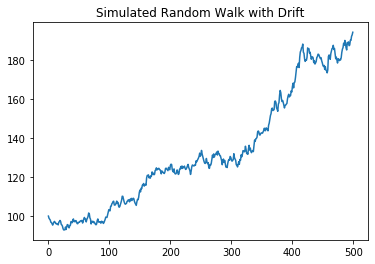

In [18]:
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

* This simulated price series you plotted should closely resemble a random walk for a high flying stock.

### Are Stock Prices a Random Walk?
Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.
With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

- Import the adfuller module from statsmodels.
- Run the Augmented Dickey-Fuller test on the series of closing stock prices, which is the column Adj Close in the AMZN DataFrame.
- Print out the entire output, which includes the test statistic, the p-values, and the critical values for tests with 1%, 10%, and 5% levels.
- Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value).

In [23]:
AMZN = pd.read_csv("Data/AMZN.csv", parse_dates=True, index_col='Date')
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [24]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

(4.02516852577074, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)


In [25]:
# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 1.0


* Since p-value is high, we can't reject the null hypothesis that the series is a random walk.

### How About Stock Returns?
In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

- Import the adfuller module from statsmodels.
- Create a new DataFrame of AMZN returns by taking the percent change of prices using the method `.pct_change()`.
- Eliminate the NaN in the first row of returns using the `.dropna()` method on the DataFrame.
- Run the Augmented Dickey-Fuller test on the Adj Close column of the returns DataFrame, and print out the p-value in `results[1].

In [29]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()
AMZN_ret.head()

,Adj Close
Date,
1997-05-15,NaN
1997-05-16,-0.117021
1997-05-19,-0.012049
1997-05-20,-0.042683
1997-05-21,-0.127389


In [30]:
# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.5655898083467396e-22


* The p-value is extremely small, so we can easily reject the hypothesis that returns are random walk at all levels of significance.

### Seasonal Adjustment During Tax Season
Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.
You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.
Look again at the ACF of H&R Block's quarterly earnings, HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,..., because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.


- Create a new DataFrame of seasonally adjusted earnings by taking the lag-4 difference of quarterly earnings using the `.diff()` method.
- Examine the first 10 rows of the seasonally adjusted DataFrame and notice that the first four rows are NaN.
- Drop the NaN rows using the `.dropna()` method.
- Plot the autocorrelation function of the seasonally adjusted DataFrame.

In [36]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
HRB.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


In [37]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


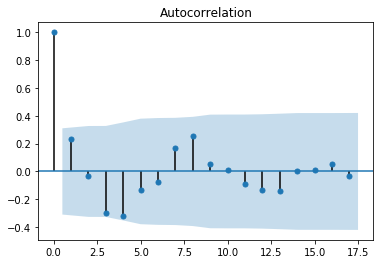

In [38]:
# Drop the NaN data in the first three three rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()